In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
N_test, _ = X_test.shape

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_test_pred = logistic_model.predict(X_test)

In [5]:
np.mean(y_test != y_test_pred)

0.052188552188552187

In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[63  0  0  0  0  0  1  0  0  0]
 [ 0 52  0  0  0  0  1  0  4  0]
 [ 0  0 56  0  0  0  0  0  1  0]
 [ 0  3  1 53  0  0  0  0  1  1]
 [ 0  0  0  0 62  0  0  1  1  0]
 [ 0  0  0  1  0 50  0  0  1  1]
 [ 0  0  0  0  1  0 54  0  1  0]
 [ 0  0  0  1  1  0  0 57  0  1]
 [ 0  1  0  1  0  0  0  0 60  3]
 [ 0  1  0  1  0  1  0  0  0 56]]


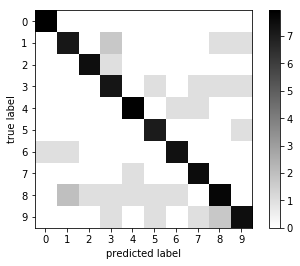

In [7]:
M = confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

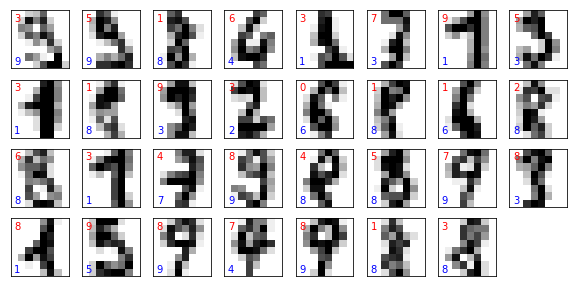

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
for i in range(N_test):
    yi_test_pred = logistic_model.predict([X_test[i, :]])[0]
    if yi_test_pred != y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary, 
                   interpolation = 'nearest')
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred), color = 'r')

## Плюсы и минусы метода логистической регрессии

**Плюсы**

* Простой метод
* Показывают хорошие результаты, когда данные линейно разделимы
* Более устойчивый к выбросам, чем LDA

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные (но можно попытаться расширить пространство признаков)
* Работают только с числовыми признаками
* Не работают напрямую с пропущенными значениями